# First Part: Importing and Analyzing our Data

In [1]:
# Let's start by loading the dataset and taking a preliminary look at its structure and some basic statistics.
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = r'C:\Users\wailb\Desktop\IronHack LABS\cleaning-categorical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv'
customer_df = pd.read_csv(file_path)

In [2]:
# Setting 'cusotmer_id' as index for our data
customer_df.set_index('Customer', inplace=True)

# Displaying the first few rows of the dataset to understand its structure
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null

In [4]:
customer_df.shape

(9134, 23)

### Key Statistics:
    * Customer Lifetime Value: Mean of ~$8,004.94, with a broad range (min $1,898.01 to max $83,325.38).
    
    * Income: Mean of ~$37,657.38, also wide-ranging (min $0 to max $99,981).
    
    * Monthly Premium Auto: Averages around $93.22, with values between $61 and $298.
    
    * Total Claim Amount: Mean of ~$434.09, with a significant range (min $0.10 to max $2,893.24).

In [5]:
# Separating continuous and discrete numerical variables into numerical_df
# and categorical variables into categorical_df

# First, let's identify continuous and discrete variables. Typically, continuous variables have a large number of unique values,
# while discrete variables have fewer unique values. However, without specific criteria, we'll initially split based on data types.

# Assuming continuous and discrete variables can be distinguished by their data types (float64 for continuous, int64 for discrete),
# and categorical variables are of type object.
numerical_df = customer_df.select_dtypes(include=['float64', 'int64'])
categorical_df = customer_df.select_dtypes(include=['object'])

# Let's display the shapes of these DataFrames to understand how the variables are divided.
numerical_df_shape = numerical_df.shape
categorical_df_shape = categorical_df.shape

numerical_df_shape, categorical_df_shape

((9134, 8), (9134, 15))

## Categorical Variables Plotting :

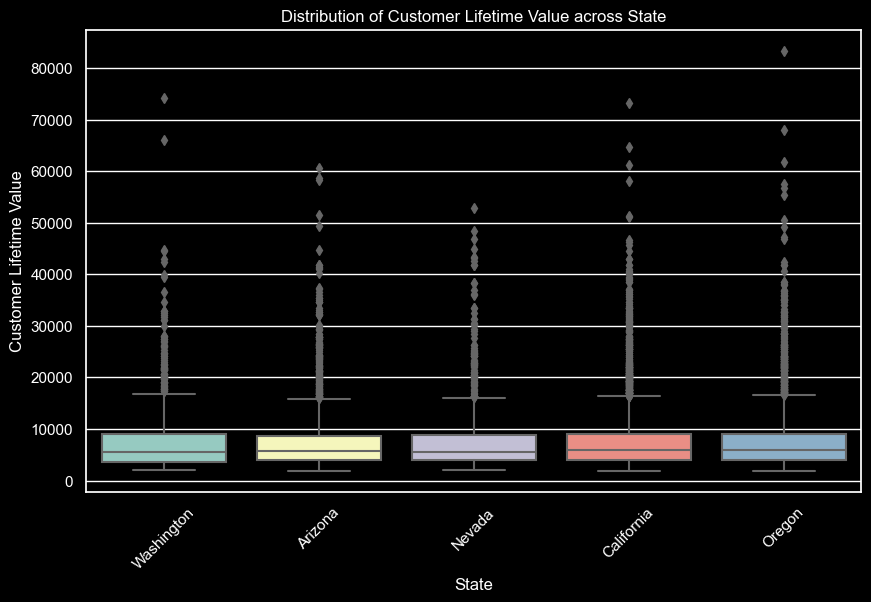

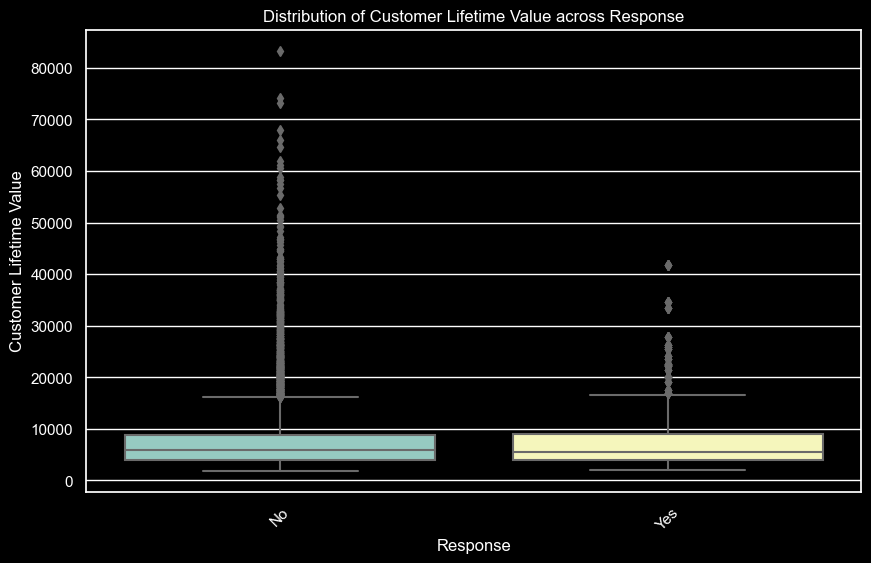

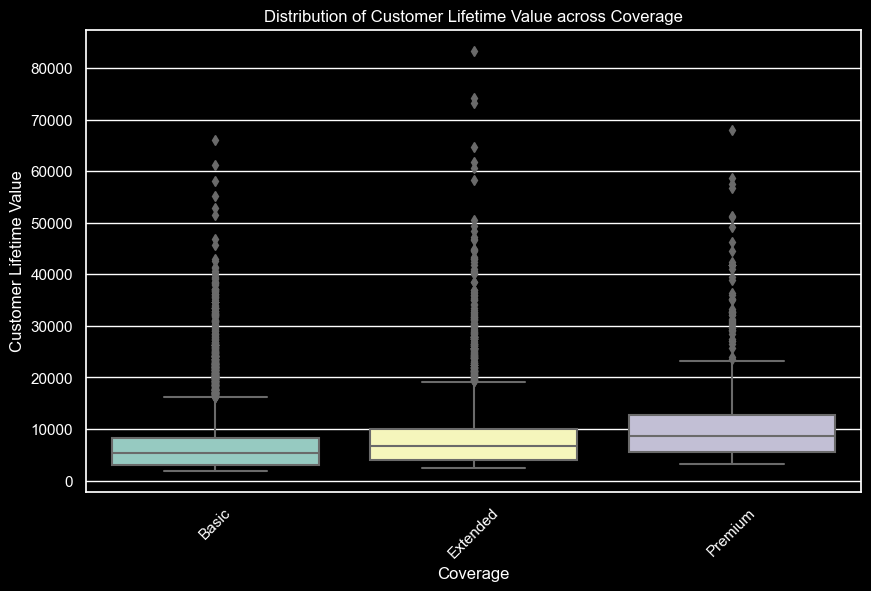

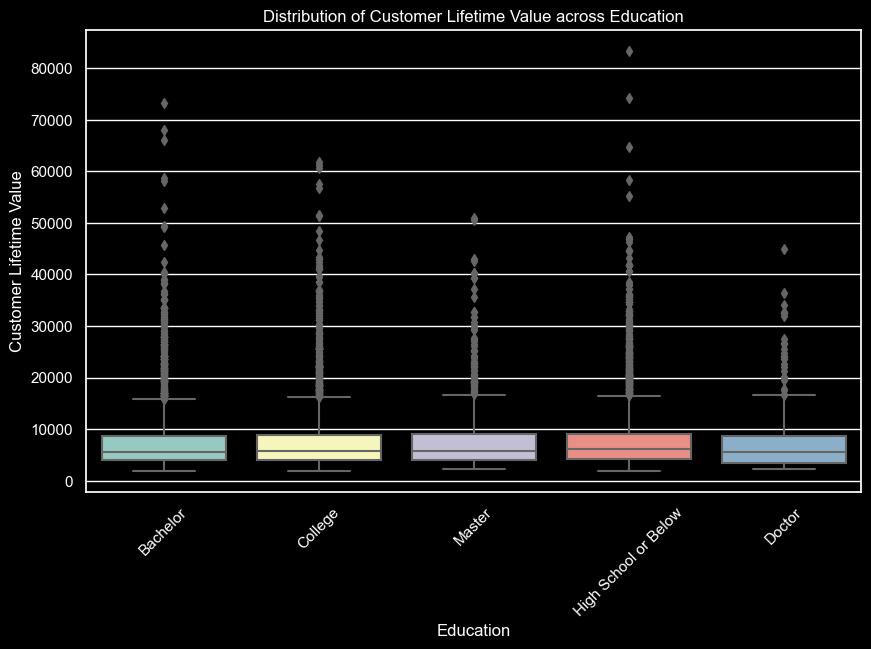

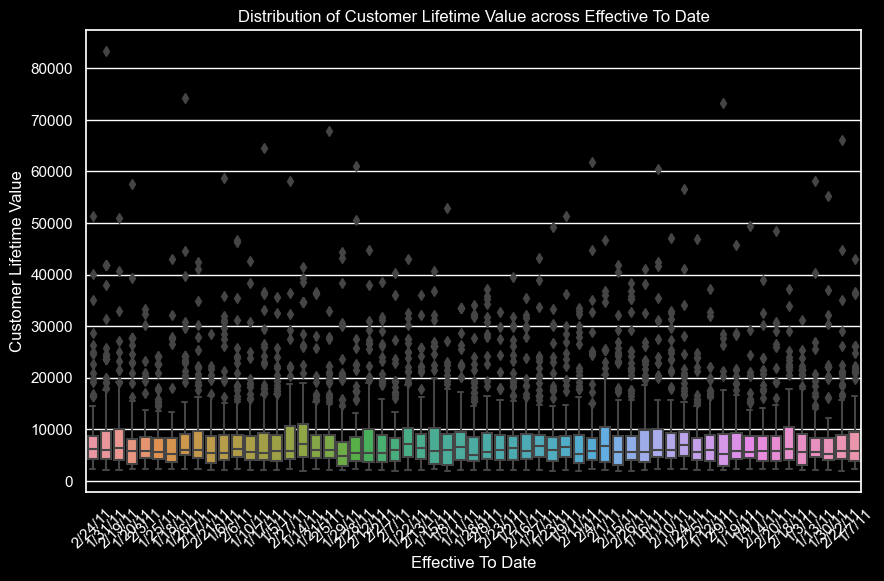

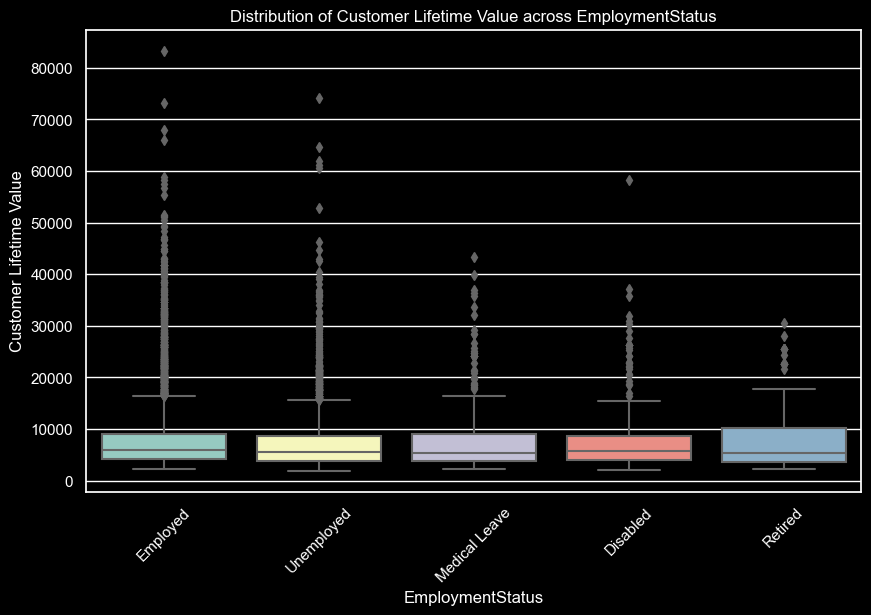

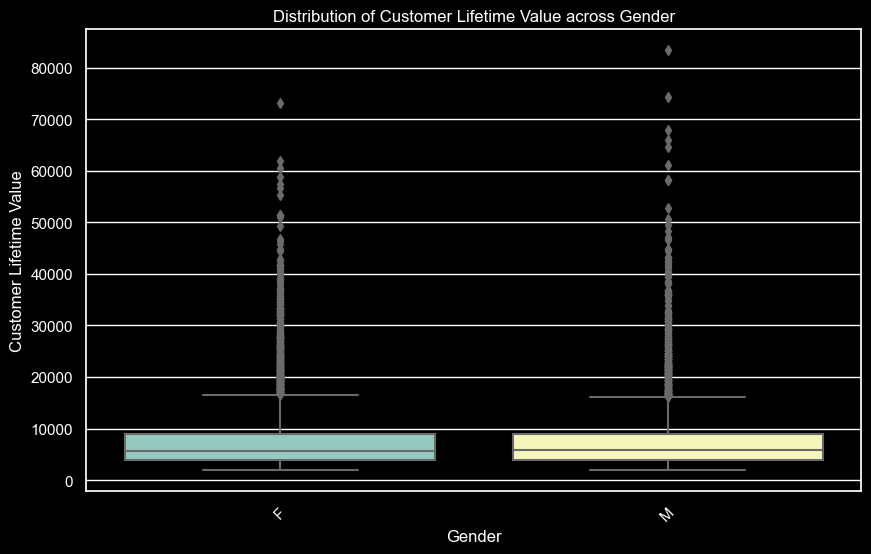

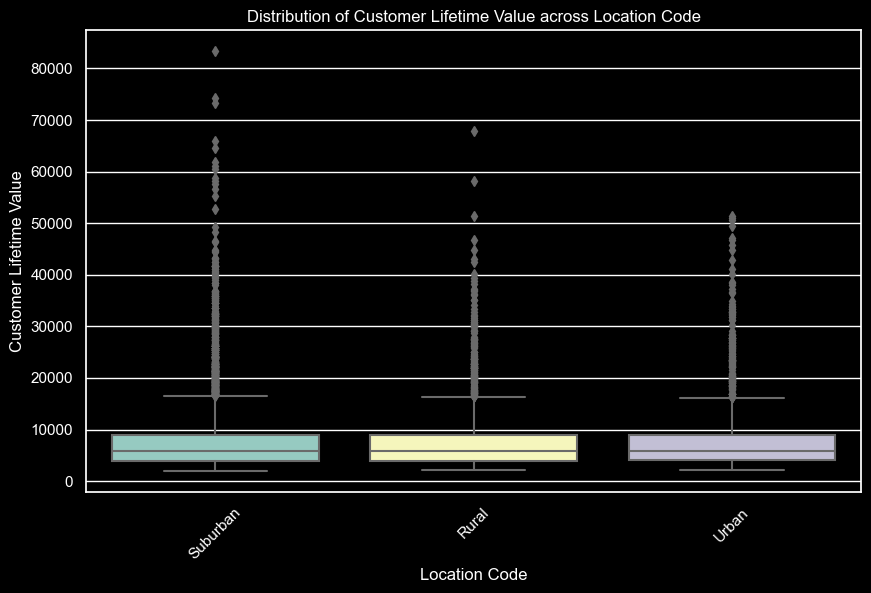

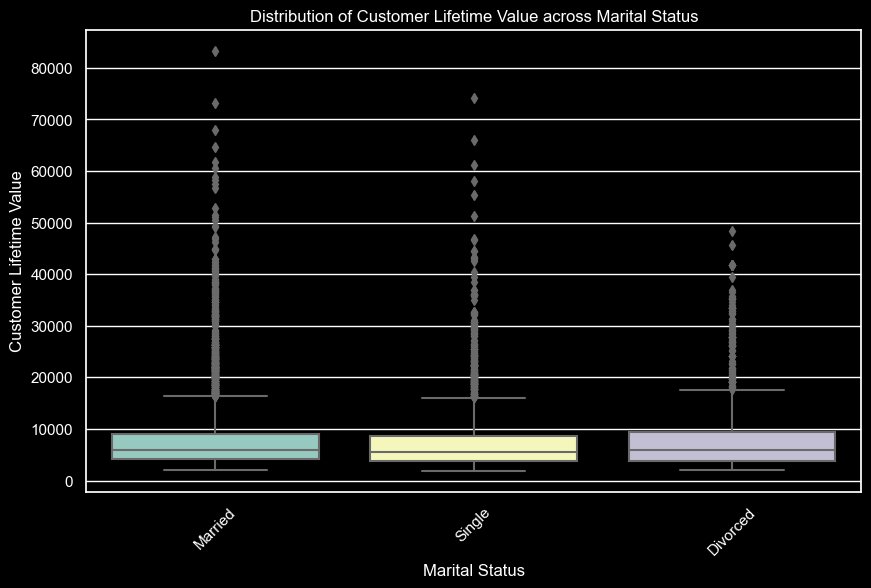

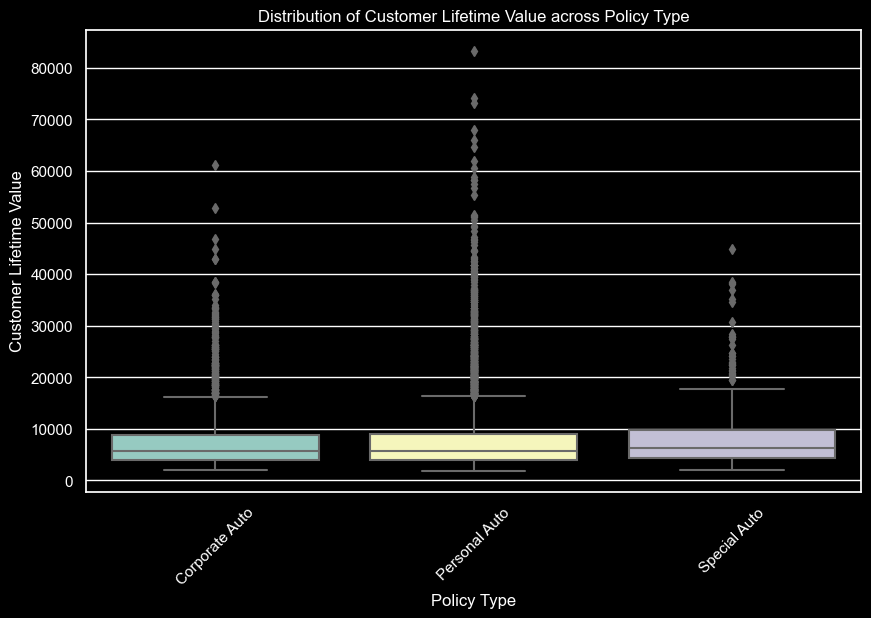

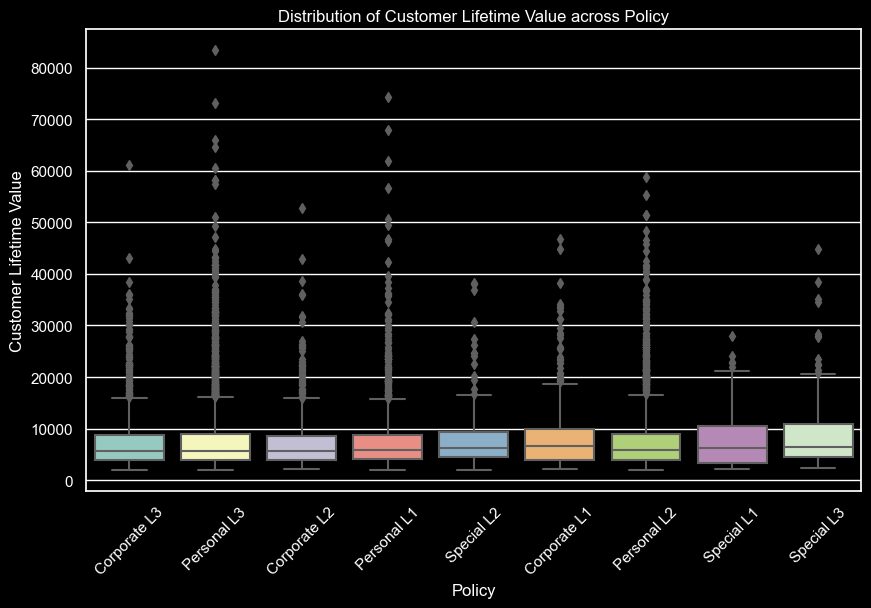

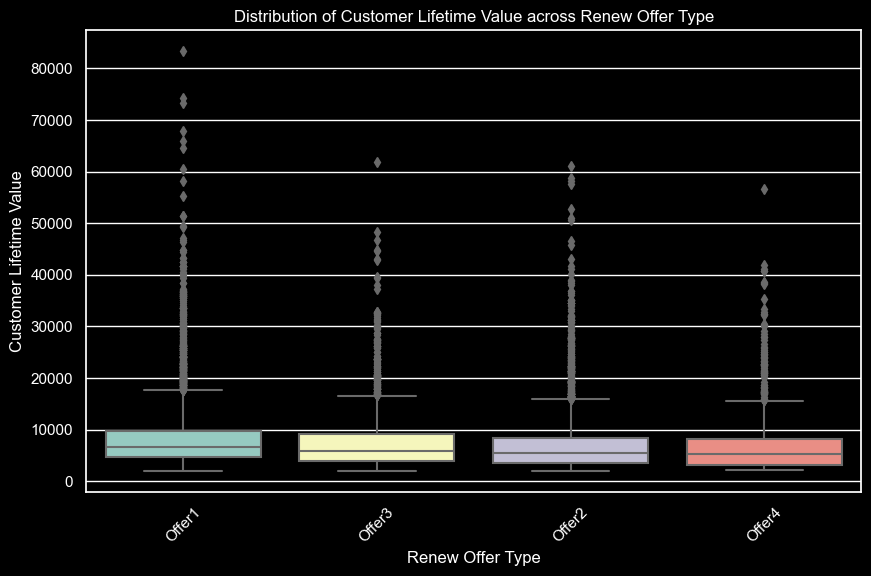

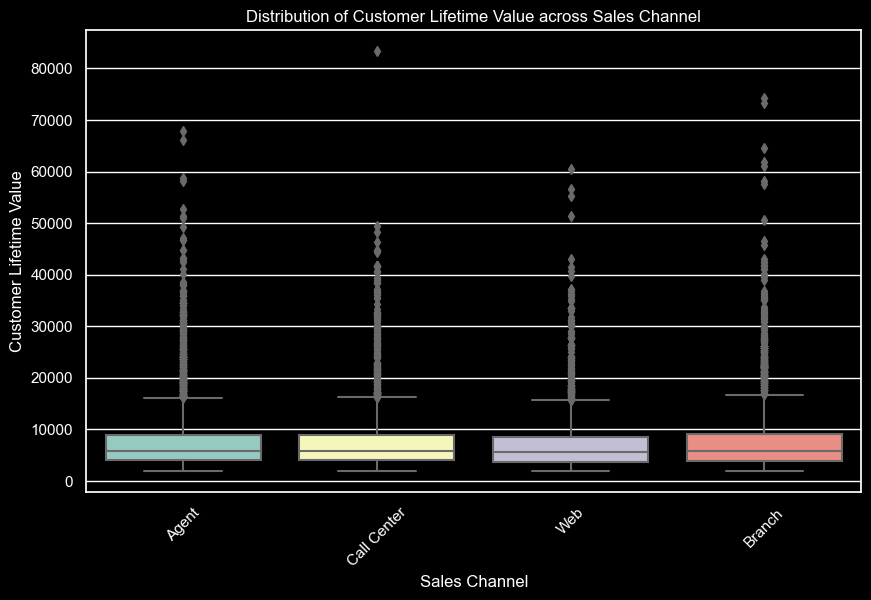

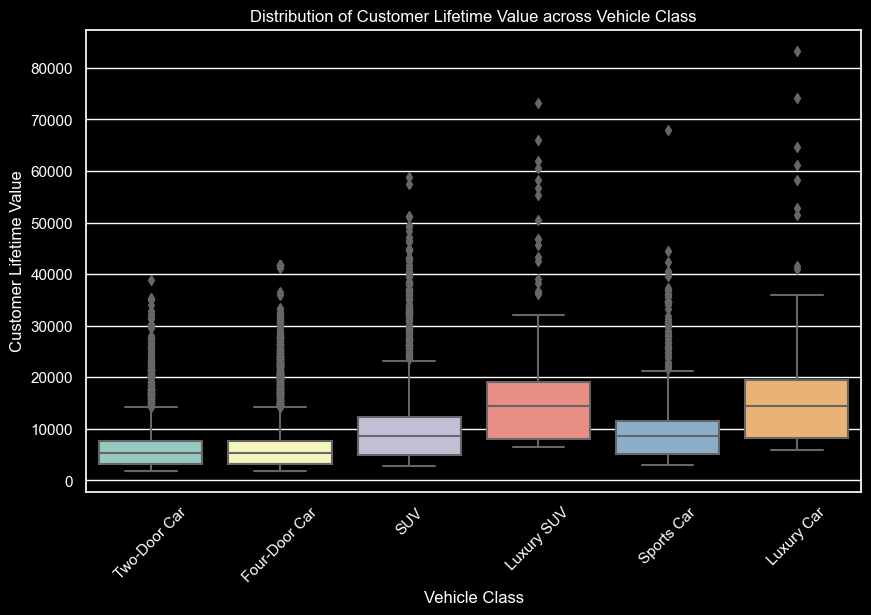

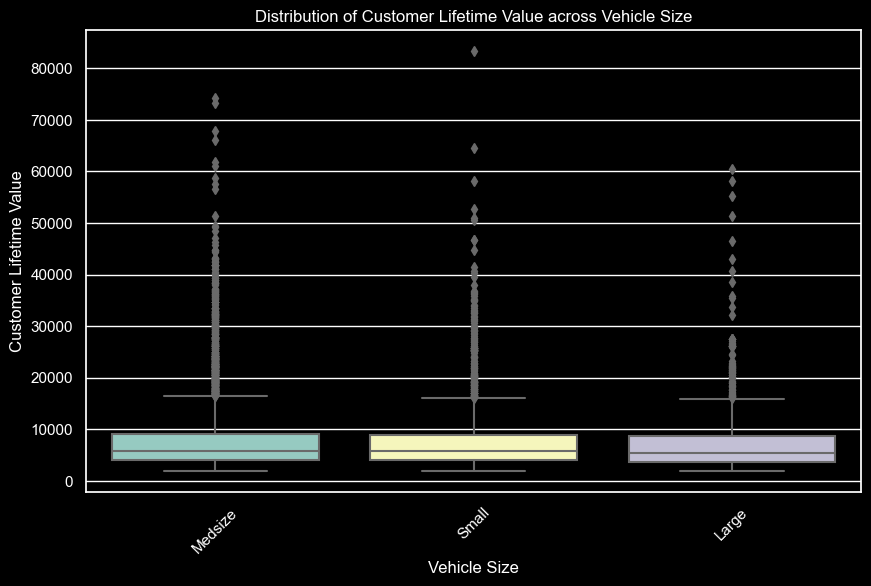

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_target = 'Customer Lifetime Value'
categorical_columns = customer_df.select_dtypes(include=['object']).columns

sns.set(style="darkgrid")
plt.style.use("dark_background")

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y=numerical_target, data=customer_df)
    plt.title(f'Distribution of {numerical_target} across {column}')
    plt.xticks(rotation=45)
    plt.show()


In [7]:
# Let's examine the categorical columns for data cleaning needs by checking the unique values and their counts.

categorical_columns = customer_df.select_dtypes(include=['object']).columns

# Using a dictionary to hold value_counts for each categorical column
category_value_counts = {column: customer_df[column].value_counts() for column in categorical_columns}

category_value_counts

{'State': State
 California    3150
 Oregon        2601
 Arizona       1703
 Nevada         882
 Washington     798
 Name: count, dtype: int64,
 'Response': Response
 No     7826
 Yes    1308
 Name: count, dtype: int64,
 'Coverage': Coverage
 Basic       5568
 Extended    2742
 Premium      824
 Name: count, dtype: int64,
 'Education': Education
 Bachelor                2748
 College                 2681
 High School or Below    2622
 Master                   741
 Doctor                   342
 Name: count, dtype: int64,
 'Effective To Date': Effective To Date
 1/10/11    195
 1/27/11    194
 2/14/11    186
 1/26/11    181
 1/17/11    180
 1/19/11    179
 1/31/11    178
 1/3/11     178
 1/20/11    173
 2/26/11    169
 1/28/11    169
 2/19/11    168
 1/5/11     167
 2/27/11    167
 1/11/11    166
 2/4/11     164
 2/10/11    161
 2/28/11    161
 1/2/11     160
 1/21/11    160
 1/29/11    160
 2/22/11    158
 2/5/11     158
 2/3/11     158
 2/7/11     157
 2/12/11    156
 1/23/11    155
 2

## Data Cleaning Insights:
    * Most categorical columns are clean and well-structured.
    
    * The Effective To Date column could be converted to datetime format for any time series analysis or to extract specific date features (like day of the week, month, etc.).
    
    * No evident mislabeling or typos in categories, suggesting minimal to no categorical data cleaning required beyond potential date conversion.
___

____

# Second Part : Feature extraction

In [11]:
# Displaying the categorical variabales
categoricals = customer_df.select_dtypes(include=['object'])
categoricals.head()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [12]:
categoricals.describe()

,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


## * Plotting Categorical Variables And Analyzing them *

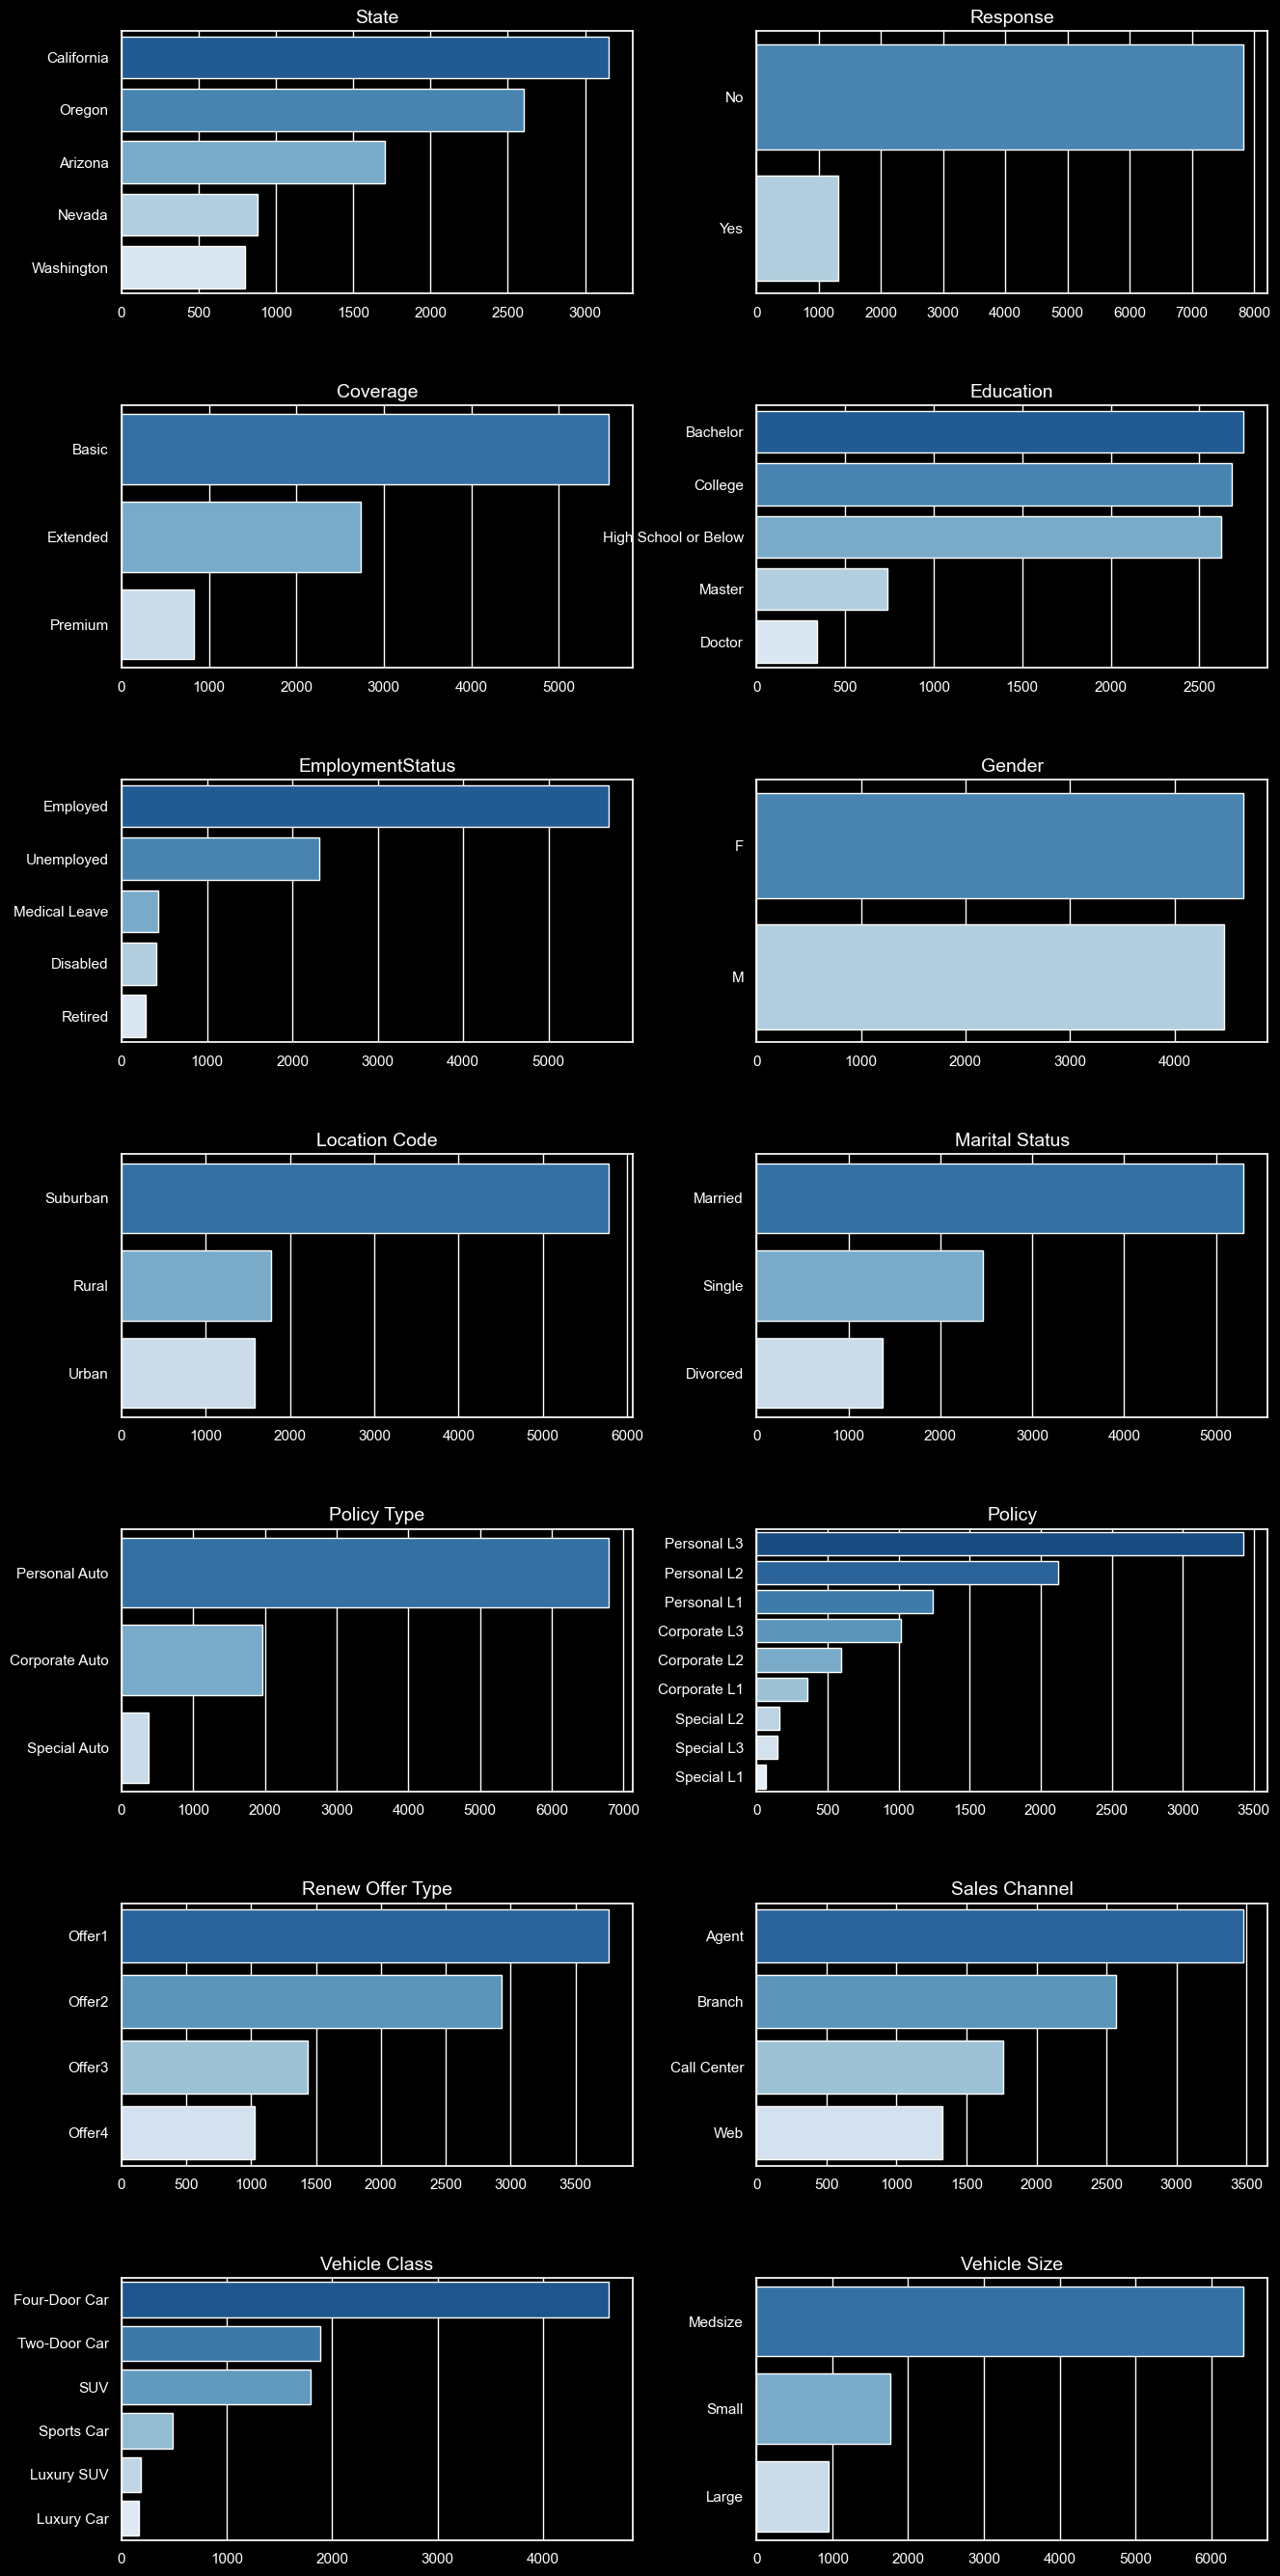

In [14]:
# We'll use count plots for each categorical variable,
# except for 'Customer' which is unique for each row and not useful for this type of plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="darkgrid")
plt.style.use("dark_background")

# We'll skip plotting 'Customer' and 'Effective To Date' as 'Customer' is unique for each entry (index)
# and 'Effective To Date' might be better visualized separately due to its nature as a date variable.
categorical_vars_to_plot = categoricals.columns.drop(['Effective To Date'])

# Determining the layout of the subplot grid
n = len(categorical_vars_to_plot)
ncols = 2
nrows = n // ncols + (n % ncols > 0)

# Creating the subplot grid
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows * 4))
fig.tight_layout(pad=5.0)

for i, var in enumerate(categorical_vars_to_plot):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]
    sns.countplot(y=var, data=categoricals, ax=ax, palette="Blues_r", order=categoricals[var].value_counts().index)
    ax.set_title(var, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Hiding any unused subplots if the number of plots is not exactly fitting the grid
if n % ncols != 0:
    for idx in range(n, nrows * ncols):
        axes.flat[idx].set_visible(False)

plt.show()

In [15]:
# Let's explore the relationship between 'Policy Type' and 'Policy' to understand their redundancy or uniqueness.
# We'll examine how 'Policy' values are distributed within each 'Policy Type'.

policy_relationship = pd.crosstab(index=categoricals['Policy Type'], columns=categoricals['Policy'])

policy_relationship

Policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
Policy Type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


### _Key insights_ :
    * Corporate Auto: Includes Corporate L1, L2, and L3 policies.
    * Personal Auto: Encompasses Personal L1, L2, and L3 policies.
    * Special Auto: Contains Special L1, L2, and L3 policies.
This structure indicates that 'Policy' is indeed a more detailed categorization within each 'Policy Type'. There's no overlap between the types of policies across different policy types, meaning each 'Policy Type' has unique 'Policy' subcategories.

__In This Case__ : Keeping both variables can be useful for analyses that require different levels of granularity. For high-level overviews, Policy Type might suffice, while Policy offers more detailed insights, especially for targeted strategies or specific policy performance analysis.

# * Plotting Time (Effective to Date) and Analyzing it *

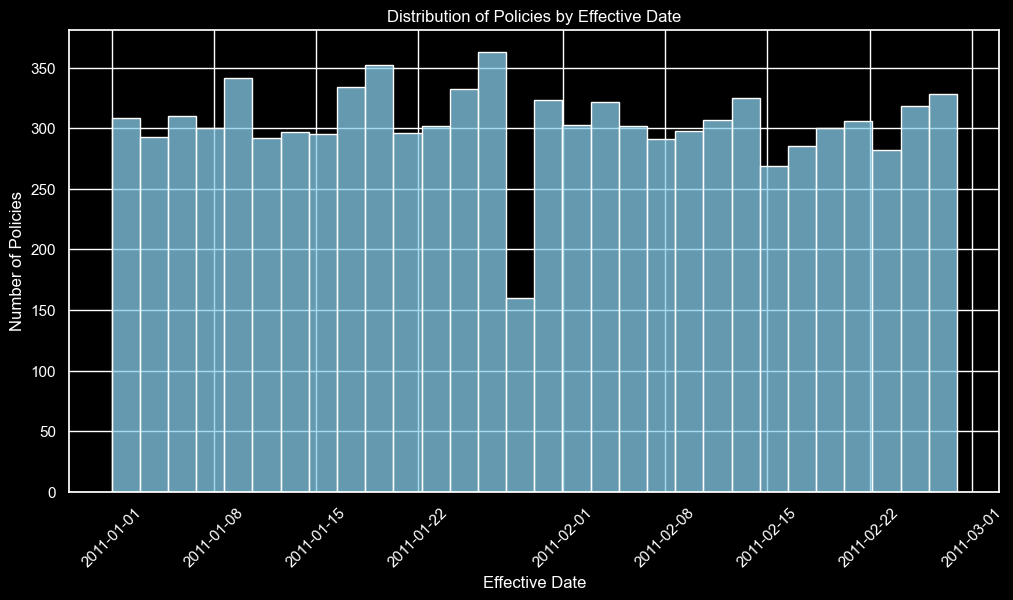

In [17]:
# To plot the 'Effective To Date' variable, we first need to convert it to a datetime type.

# Converting 'Effective To Date' to datetime
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(categoricals['Effective To Date'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Policies by Effective Date')
plt.xlabel('Effective Date')
plt.ylabel('Number of Policies')
plt.xticks(rotation=45)
plt.show()

### _Key insights_:
    * Uniform Distribution: The even spread suggests that new policies are being initiated consistently throughout these two months, without any obvious peaks or lulls.
    
    * No Seasonal Bias: At least within this two-month window, there doesn't seem to be a seasonal or time-specific bias     toward when policies are started.

    * Data Collection Window: The data is limited to the start of 2011, which means any analysis on time trends or          seasonality is constrained to this period. It's unclear if this pattern holds across multiple years or different times   of the year.